In [7]:
pip install opencv-python


The following command must be run outside of the IPython shell:

    $ pip install opencv-python

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [114]:
!pip install numpy

In [160]:
import os
import cv2
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'keras'

In [116]:
df1=pd.DataFrame()
df1['image']=['data/trains/PNEUMONIA/'+i for i in os.listdir('data/trains/PNEUMONIA/')]
df1['label']=1
df2=pd.DataFrame()
df2['image']=['data/trains/NORMAL/'+i for i in os.listdir('data/trains/NORMAL/')]
df2['label']=0
dfs=pd.concat([df1,df2])
dfs

,image,label
0,data/trains/PNEUMONIA/BloodImage_00152_jpg.rf....,1
1,data/trains/PNEUMONIA/BloodImage_00249_jpg.rf....,1
2,data/trains/PNEUMONIA/BloodImage_00031_jpg.rf....,1
3,data/trains/PNEUMONIA/BloodImage_00039_jpg.rf....,1
4,data/trains/PNEUMONIA/BloodImage_00014_jpg.rf....,1
5,data/trains/PNEUMONIA/BloodImage_00030_jpg.rf....,1
6,data/trains/PNEUMONIA/BloodImage_00036_jpg.rf....,1
7,data/trains/PNEUMONIA/BloodImage_00008_jpg.rf....,1
8,data/trains/PNEUMONIA/BloodImage_00268_jpg.rf....,1
9,data/trains/PNEUMONIA/BloodImage_00031_jpg.rf....,1


In [117]:
# val集dvs表示v
dv1=pd.DataFrame()
dv1['image']=['data/valids/PNEUMONIA/'+i for i in os.listdir('data/valids/PNEUMONIA/')]
dv1['label']=1
dv2=pd.DataFrame()
dv2['image']=['data/valids/NORMAL/'+i for i in os.listdir('data/valids/NORMAL/')]
dv2['label']=0
dvs=pd.concat([dv1,dv2])
dvs

,image,label
0,data/valids/PNEUMONIA/BloodImage_00021_jpg.rf....,1
1,data/valids/PNEUMONIA/BloodImage_00017_jpg.rf....,1
2,data/valids/PNEUMONIA/BloodImage_00134_jpg.rf....,1
3,data/valids/PNEUMONIA/BloodImage_00000_jpg.rf....,1
4,data/valids/PNEUMONIA/BloodImage_00038_jpg.rf....,1
5,data/valids/PNEUMONIA/BloodImage_00012_jpg.rf....,1
6,data/valids/PNEUMONIA/BloodImage_00044_jpg.rf....,1
7,data/valids/PNEUMONIA/BloodImage_00086_jpg.rf....,1
8,data/valids/PNEUMONIA/BloodImage_00004_jpg.rf....,1
9,data/valids/PNEUMONIA/BloodImage_00350_jpg.rf....,1


In [118]:
# 将图片大小调为一样
def transform_image(img_list):
    # 将图片大小调整为 224x224
    img = cv2.resize(img_list, (224, 224))
    # 将图片从BGR颜色空间转换为RGB颜色空间
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [119]:
str(dfs['image'].iloc[0])

'data/trains/PNEUMONIA/BloodImage_00152_jpg.rf.271b40035435e2820915e6452cac5b32.jpg'

In [121]:
# 生成第一个图像的img数组
img = transform_image(cv2.imread(str(dfs['image'].iloc[0])))
imgs = img.reshape(1, 224*224*3)
labels = [dfs['label'].iloc[0]]
# 读取并转换后续的图像
for i in range(1, len(dfs)):
    img = transform_image(cv2.imread(str(dfs['image'].iloc[i])))
    img = img.reshape(1, 224*224*3)
    labels.append(dfs['label'].iloc[i])
    # 将当前图像合并到数组中
    imgs = np.concatenate((imgs, img), axis=0)

In [71]:
'''
# 生成第二个图像的img_test数组
img_test = transform_image(cv2.imread(str(des['image'].iloc[0])))
imgs_test = img_test.reshape(1, 224*224*3)
labels_test = [des['label'].iloc[0]]
# 读取并转换后续的图像
for i in range(1, len(des)):
    img_test = transform_image(cv2.imread(str(des['image'].iloc[i])))
    img_test = img_test.reshape(1, 224*224*3)
    labels_test.append(des['label'].iloc[i])
    # 将当前图像合并到数组中
    imgs_test = np.concatenate((imgs_test, img_test), axis=0)
'''

In [122]:
# 生成第三个图像的imgs_val数组
img_val = transform_image(cv2.imread(str(dvs['image'].iloc[0])))
imgs_val = img_val.reshape(1, 224*224*3)
labels_val = [dvs['label'].iloc[0]]
# 读取并转换后续的图像
for i in range(1, len(dvs)):
    img_val = transform_image(cv2.imread(str(dvs['image'].iloc[i])))
    img_val = img_val.reshape(1, 224*224*3)
    labels_val.append(dvs['label'].iloc[i])
    # 将当前图像合并到数组中
    imgs_val = np.concatenate((imgs_val, img_val), axis=0)

In [73]:
'''
# 随机打乱们
def splitDataset(x, y, x_test, y_test, x_val, y_val):
    result = pd.DataFrame(x)
    result['label'] = y
    # 随机打乱数据
    result = result.sample(frac=1).reset_index(drop=True)

    result_test = pd.DataFrame(x_test)
    result_test['label'] = y_test

    # 随机打乱测试数据
    result_test = result_test.sample(frac=1).reset_index(drop=True)

    result_val = pd.DataFrame(x_val)
    result_val['label'] = y_val

    # 随机打乱验证数据
    result_val = result_val.sample(frac=1).reset_index(drop=True)
    
    # 将DataFrame转换为训练集、验证集和测试集
    training_set = result
    cv_set = result_val
    test_set = result_test
    
    return training_set, cv_set, test_set
'''

In [74]:
training_set,cv_set,test_set = splitDataset(imgs,labels,imgs_val,labels_val,imgs_test,labels_test)

In [123]:
x_train = training_set.drop("label",axis = 1)
y_train = training_set['label']

In [124]:
x_cv = cv_set.drop("label",axis = 1)
y_cv = cv_set['label']

In [125]:
x_test = test_set.drop("label",axis = 1)
y_test = test_set['label']

In [126]:
#模型训练函数
from sklearn.linear_model import LogisticRegression

In [127]:
# 模型训练函数
def fit_LR(x, y, c=1):
    clf = LogisticRegression(C=c)
    clf.fit(x, y)
    return clf

In [128]:
model = fit_LR(x_train, y_train)

In [129]:
# 分类误差函数
def compute_error_lr(model, x, y):
    acc = model.score(x, y)
    error = 1 - acc
    return error

In [130]:
#训练集
error1 = compute_error_lr(model,x_train,y_train)
print('训练集分类误差：',error1)

训练集分类误差： 0.0


In [131]:
'''
#验证集
error2 = compute_error_lr(model,x_cv,y_cv)
print('验证集集分类误差：',error2)
'''

验证集集分类误差： 0.0


In [132]:
#测试集
error3 = compute_error_lr(model,x_test,y_test)
print('测试集分类误差：',error3)

测试集分类误差： 0.2075471698113207


In [133]:
lambda1 = np.linspace(0,8, num=21)
Cs = [1 if l == 0 else 1/l for l in lambda1]

In [134]:
train_scores = []
cv_scores = []
test_scores = []

for C in list(lambda1[1:]):
    model1 = fit_LR(x_train,y_train,c = C)
    error1 = compute_error_lr(model1,x_train,y_train)
    error2 = compute_error_lr(model1,x_cv,y_cv)
    error3 = compute_error_lr(model1,x_test,y_test)
    train_scores.append(error1)
    cv_scores.append(error2)
    test_scores.append(error3)

In [135]:
train_scores = []
cv_scores = []
test_scores = []

# 在'for'循环内部对模型进行了训练并计算误差
for i in range(100, 3100, 100):
    now_x = x_train[:i]
    now_y = y_train[:i]
    model1 = fit_LR(now_x, now_y, c=2)
    error1 = compute_error_lr(model1, now_x, now_y)
    error2 = compute_error_lr(model1, x_cv, y_cv)
    error3 = compute_error_lr(model1, x_test, y_test)
    train_scores.append(error1)
    cv_scores.append(error2)
    test_scores.append(error3)

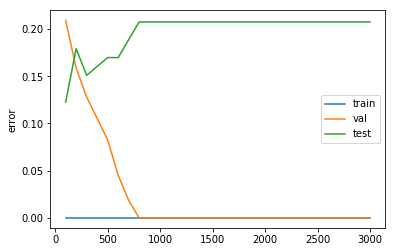

In [136]:
plt.plot(list(range(100,3100,100)),train_scores,label = 'train')
plt.plot(list(range(100,3100,100)),cv_scores,label = 'val')
plt.plot(list(range(100,3100,100)),test_scores,label = 'test')
plt.legend()
plt.ylabel('error')
plt.show()

In [137]:
# 训练决策树模型
from sklearn.tree import DecisionTreeClassifier

In [138]:
def train_decision_tree_model(X_train, Y_train):
    DT_model = DecisionTreeClassifier(criterion='entropy')
    DT_model.fit(X_train, Y_train)
    return DT_model

In [139]:
model_dt = train_decision_tree_model(x_train, y_train)

In [140]:
# 训练集dt
error1_dt = compute_error_lr(model_dt, x_train, y_train)
print('训练集分类误差：', error1_dt)

训练集分类误差： 0.0


In [97]:
'''
# 验证集_dt
error2_dt = compute_error_lr(model_dt, x_cv, y_cv)
print('验证集分类误差：', error2_dt)
'''

验证集分类误差： 0.0


In [141]:
# 测试集_dt
error3_dt = compute_error_lr(model_dt, x_test, y_test)
print('测试集分类误差：', error3_dt)

测试集分类误差： 0.17924528301886788


In [142]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# 随机网格搜索
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [143]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
clf_dt = DecisionTreeClassifier()
# 给定参数搜索范围：list or distribution
# 以随机分布的形式进行搜索
param_dist_dt = {"max_depth": [3, None],
                 "min_samples_split": sp_randint(2, 11),
                 "criterion": ["gini", "entropy"]}

In [144]:
n_iter_search = 20
# 训练决策树分类器模型，并对模型进行超参数搜索
random_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_dist_dt, n_iter=n_iter_search, cv=5, iid=False)
random_search_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=False, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0bb601d68>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [145]:
# 训练随机森林分类器模型，并分别使用测试集和交叉验证集对模型进行评估
model_dt = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=5)
model_dt.fit(x_train, y_train)
test_score = model_dt.score(x_test, y_test)
cv_score = model_dt.score(x_cv, y_cv)
print("Test Score: ", test_score)
print("CV Score: ", cv_score)

Test Score:  0.8867924528301887
CV Score:  0.968


In [146]:
# 训练集分类误差
train_error_dt = compute_error_lr(model_dt, x_train, y_train)
print('训练集分类误差：', train_error_dt)

训练集分类误差： 0.03200000000000003


In [147]:
'''
# 验证集分类误差
cv_error_dt = compute_error_lr(model_dt, x_cv, y_cv)
print('验证集分类误差：', cv_error_dt)
'''

验证集分类误差： 0.03200000000000003


In [148]:
# 测试集分类误差
test_error_dt = compute_error_lr(model_dt, x_test, y_test)
print('测试集分类误差：', test_error_dt)

测试集分类误差： 0.1132075471698113


In [150]:
# 随机森林
clf = RandomForestClassifier(n_estimators=20)

In [151]:
# 给定参数搜索范围：list or distribution
param_dist = {"max_depth": [3, None],                     #给定list
              "max_features": sp_randint(1, 11),          #给定distribution
              "min_samples_split": sp_randint(2, 11),     #给定distribution
              "criterion": ["gini", "entropy"]}           #给定list
# 使用RandomizedSearchCV选取超参数
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=False, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0bb67d128>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0bb67de10>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [152]:
print(random_search.best_params_)
model_rft = RandomForestClassifier(criterion='gini', max_features=7, min_samples_split=2)
model_rft.fit(x_train, y_train)
print("测试集分类准确率：", model_rft.score(x_test, y_test))
print("验证集分类准确率：", model_rft.score(x_cv, y_cv))

{'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 5}
测试集分类准确率： 0.8773584905660378
验证集分类准确率： 0.9866666666666667


In [153]:
# 训练集_rft
error1_rft = compute_error_lr(model_rft, x_train, y_train)
print('训练集分类误差：', error1_rft)

训练集分类误差： 0.013333333333333308


In [154]:
'''
# 验证集_rft
error2_rft = compute_error_lr(model_rft, x_cv, y_cv)
print('验证集分类误差：', error2_rft)
'''

验证集分类误差： 0.013333333333333308


In [155]:
# 测试集_rft
error3_rft = compute_error_lr(model_rft, x_test, y_test)
print('测试集分类误差：', error3_rft)

测试集分类误差： 0.12264150943396224


In [156]:
# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [161]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

AttributeError: 'LogisticRegression' object has no attribute 'evaluate'